# Lesson 3. Comparison functions

<b>Recommended preliminary knowledge:</b> Be familiar with setting up thermodynamic calculations using the xThermoInterface python package, and be able to perform simple simple thermodynami calculations using the package. See Jupyter Notebook <b>INSERT NOTEBOOK HERE WHEN MADE</b>

Development of thermodynamic modelling functions: Xiaodong Liang<br>
Development of comparison functions: Daniel Qvistgaard<br>
Jupyter Notebook author: Daniel Qvistgaard

## 1. Introduction 

Comparison functions are used to measure the ability of a model to predict experimental data. For each thermodynamic function, a corresponding comparison function exist. The comparison function uses experimental data as input,  and outputs the deviation between model predictions and experimental data.

Various types of deviations exist, and choosing a type depends on the context.
- Absolute Relative Deviation (ARD) : $ARD = abs(\frac{model-exp}{exp})\cdot 100\%$
- Absolute Deviation (AD) : $AD = abs( model - exp )$
- Relative Deviation (RD) : $RD = \frac{model-exp}{exp}\cdot 100\%$

If ARD is chosen, the output unit will always be percentage. If AD is chosen, the output unit will always be the physical unit of the corresponding thermodynamic property.<br>

**Feel free** to run the code live in this Jupyter Notebook document. For any code to work, make sure to run all the code in the initialization section. Afterwards, code may be run for each individual comparison function.

## 2. Initialization

In order to use any comparison functions, the following function library must be called.

In [1]:
#from functions.comparisonFcn import *

Now, prepare for thermodynamic calculations as one normally would. Load xThermoInterface to get access to the usual thermodynamic functions. It is also recommended to import numpy, matplotlib and pandas.

In [2]:
import xThermoInterface as xt #Required
import numpy as np #Recommended
from matplotlib import pyplot as plt #Recommended - used for plotting
import pandas as pd #Recommended

**Make sure to run the above code, if you wish to perform any calculations live in this document!!**

## 3. Thermodynamic Properties

This section contains thermodynamic properties used for modelling examples in this Jupyter notebook. Whenever calculations are run in this document, they are based on these properties.
### 3.1 Critical Properties
The following table contains the critical properties for the compounds used in this document

| Compound | Tc [K] | Pc [bar] |  omega  |       Source      |
|:--------:|:------:|:--------:|:-------:|:-----------------:|
|    Water |  647.3 |    220   |  0.3449 | Will insert later |
|  Methane |  190.6 |   45.9   | 0.01155 | Will insert later |
|      MEG |  719.7 |   82.0   |  0.5211 | Will insert later |

### 3.2 CPA Parameters
CPA parameters for the compounds used in this document are found in the table below

| Compound | b [cm^3/ mol] | gamma [K] |   c1   | beta*10^3 | eps/R [K] | Assoc. Scheme |       Source      |
|:--------:|:----------:|:---------:|:------:|:---------:|:---------:|:-------------:|:-----------------:|
|    Water |  14.515  |   1017.3  | 0.6736 |    69.2   |   2003.2  |       4C      | Will insert later |
|  Methane |   29.10  |   959.03  | 0.4472 |    N/A    |    N/A    |      N/A      | Will insert later |
|      MEG |   51.4   |   2531.7  | 0.6744 |    14.1   |   2375.8  |       4C      | Will insert later |

### 3.3 Binary interaction parameters
The binary interaction parameters used in this document are found in the tble below.

| Compound 1 | Compound 2 |   kij  |       Source      |
|:----------:|:----------:|:------:|:-----------------:|
|   MEG(4C)  |   Methane  | 0.1787 | Will insert later |

## 4. Functions 

In general, a comparison function exist for every single model function. In order to obtain helpful information on any function, execute help(functionName)

**Table of Contents**<br>
[PBubble](#4.1-PBubble)<br>
[TBubble](#4.2-TBubble)<br>
[PDew](#4.3-PDew)<br>
[TDew](#4.4-TDew)<br>
[LiqRho](#4.5-LiqRho)<br>
[PTFlash](#4.6-PTFlash)<br>
***

### 4.1 PBubble

In this example we calculate the bubble pressure for a pure component, using CPA. First, we set up CPA for water

In [3]:
Case = xt.xThermoInterface()
Case.ChooseAModel(1)
nc = 1
Case.NoPureComp(nc)
Case.CritProps(1, 647.29, 220.64000, 0.3449)
Case.CPAParams(1, 14.515, 1017.3, 0.6736)
Case.AssocParams(1, 22, 69.2, 2003.2)

Now we load experimental data as a list of values. The comparison function requires a composition (in thise case it is 1, since it is a pure component system). Furthermore, the function needs a temperature list and pressure list.

In [4]:
h2o_vap_pressure = pd.read_csv('experimental_data/h2o_vapor_pressure.csv').to_numpy()
expT = h2o_vap_pressure[:,0]
expP = h2o_vap_pressure[:,1]
expComposition = [1.0] #Feed composition

#It is recommended to define an initial estimation of the bubble pressure, however this is not necessary.
#The estimate helps the algorithm find the real answer, 
#so you dont need to use it unless you are getting strange results.
P_ini = 0.5 #bars

Why are we loading vapor pressure data? Remember that for pure components, the bubble pressure is equal to the vapor pressure for the pure component, and thus we can use vapor pressure date for the bubble pressure. The comparison is run using relative deviation as the type of deviation.

In [5]:
Case.Setup_Thermo()
CompObject = xt.ComparisonFuncs(Case,'ARD')

deviation = CompObject.PBubble_comparison(expT,expP,expComposition,P_ini) #This is the comparison function, 
#which returns a list of deviations between the model and experimental data

#Here we model the vapor pressure of water over the temperature range 0-100 degrees celsius.
T_model = np.linspace(273.15,373.15,100)
P_model = []
for T in T_model:
    P, LnK, ierr = Case.PBubble(T,[1.0])
    P_model.append(P)
    
Case.Finishup_Thermo()

print(deviation) #Deviation in percentage

[ 2.27453764  1.71603793  1.22052497  0.79594311  0.42436249  0.10194402
  0.17327442  0.40669417  0.60301425  0.76144507  0.89933125  1.00079047
  1.07925261  1.13895289  1.17548774  1.19372944  1.63941792  2.77654191
  6.32489483 85.86736742]


Since it is absolute relative deviation, the unit of the returned deviations are in percentage

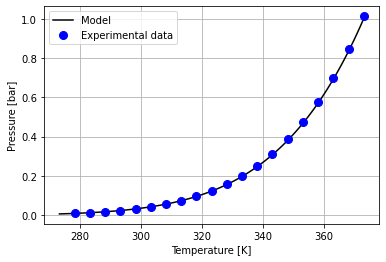

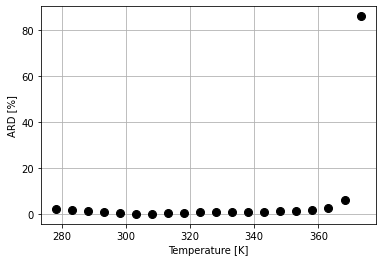

In [6]:
#Plot 1 - Bubble pressure (vapor pressure) vs temperature
plt.plot(T_model,P_model,color="black")
plt.plot(expT,expP,'o',color="blue",markersize=  8)
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [bar]")
plt.grid()
plt.legend(["Model","Experimental data"])
plt.show()

#Plot 2 - Absolute relative deviation vs temperature
plt.plot(expT,deviation,marker='o',color='black',linestyle='',markersize=8)
plt.grid()
plt.xlabel("Temperature [K]")
plt.ylabel("ARD [%]")
plt.show()

### 4.2 TBubble 

In this example we calculate the bubble temperature for a pure component, using CPA. First, we set up CPA for water using the thermodynamic properties showcased in section 3.

In [7]:
Case = xt.xThermoInterface() #Loading the interface
Case.ChooseAModel(1) #1 - CPA
nc = 1 #Number of components
Case.NoPureComp(nc) #Setting the number of components
Case.CritProps(1, 647.29, 220.64000, 0.3449) #Setting the critical properties of water
Case.CPAParams(1, 14.515, 1017.3, 0.6736) #Setting the physical CPA parameters of water
Case.AssocParams(1, 22, 69.2, 2003.2) #Setting the association parameters of water

Now we load experimental data as a list of values. The comparison function requires a composition (in thise case it is 1, since it is a pure component system). Furthermore, the function needs a temperature list and pressure list.

In [8]:
expT = [373,406,425] #Temperature (K)
expP = [1.0135,3,5] #Pressure (bar)
expComposition = [1.0] #Feed composition

The comparison is run using absolute relative deviation as the type of deviation.

In [9]:
Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case, 'ARD')

deviation = CompObject.TBubble_comparison(expT,expP,expComposition)

Case.Finishup_Thermo()

print(deviation) #Deviation in percentage

[0.12717115 0.22916237 0.03178458]


Since the deviation type is absolute relative deviation, the result is given in percentage [%]

### 4.3 PDew 

In [10]:
Case = xt.xThermoInterface()
Case.ChooseAModel(1)
nc = 1
Case.NoPureComp(nc)
Case.CritProps(1, 647.29, 220.64000, 0.3449)
Case.CPAParams(1, 14.515, 1017.3, 0.6736)
Case.AssocParams(1, 22, 69.2, 2003.2)

Now we load experimental data as a list of values. The comparison function requires a composition (in thise case it is 1, since it is a pure component system). Furthermore, the function needs a temperature list and pressure list.

In [11]:
expT = [373,406,425] #Temperature (K)
expP = [1.0135,3,5] #Pressure (bar)
expComposition = [1.0] #Feed composition

The comparison is run using absolute deviation as the type of deviation.

In [12]:
Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case,'AD')

deviation = CompObject.PDew_comparison(expT,expP,expComposition)

Case.Finishup_Thermo()

print(deviation)

[0.01699832 0.08112586 0.01797717]


Since it is absolute deviation, the unit of the returned deviations are in bars.

### 4.4 TDew 

In this section the dew tew temperature of water is the thermodynamic property of interest. Experimental data is compared with model predictions. Firstly, set up the model. In this scenario CPA is used, and the compound being modelled is pure water.

In [13]:
Case = xt.xThermoInterface()
Case.ChooseAModel(1) # CPA = 1
nc = 1
Case.NoPureComp(nc)
Case.CritProps(1, 647.29, 220.64000, 0.3449)
Case.CPAParams(1, 14.515, 1017.3, 0.6736)
Case.AssocParams(1, 22, 69.2, 2003.2)

Now we load experimental data as a list of values. The comparison function requires a composition (in thise case it is 1, since it is a pure component system). Furthermore, the function needs a temperature list and pressure list.

In [14]:
h2o_vap_pressure = pd.read_csv('experimental_data/h2o_vapor_pressure.csv').to_numpy()
expT = h2o_vap_pressure[:,0].tolist()
expP = h2o_vap_pressure[:,1].tolist()
expComposition = [1.0] #Feed composition

#For this calculation, it is important to come up with a good initial estimate for the dew temperature.
T_ini = 300 #Kelvin

The comparison is run using absolute relative deviation as the type of deviation.

In [15]:
Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case,'RD')

deviation = CompObject.TDew_comparison(expT,expP,expComposition,T_ini)

#Here we model the vapor pressure of water over the temperature range 0-100 degrees celsius.
P_model = np.linspace(0.01,1.0135,100)
T_model = []
for P in P_model:
    T, LnK, ierr = Case.TDew(P,[1.0])
    T_model.append(T)

Case.Finishup_Thermo()

print(deviation)

[-0.11819249 -0.09133328 -0.06649679 -0.04436235 -0.02418341 -0.00593702
  0.01030745  0.02469964  0.03737353  0.04813878  0.05797563  0.06575795
  0.07225223  0.07766258  0.08161052  0.08435538  0.08601151  0.08654904
  0.08609999  0.08458549]


Since the deviation type is absolute relative deviation, the result is given in percentage [%]

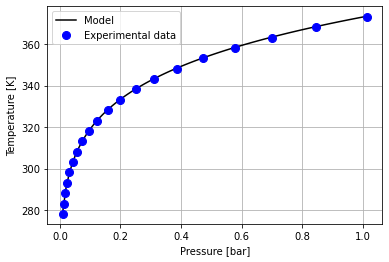

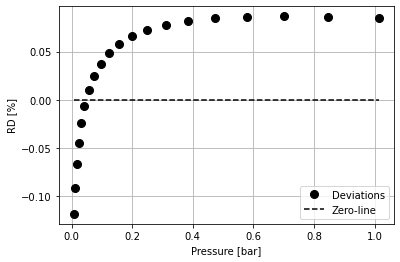

In [16]:
#Plot 1 - Dew pressure vs temperature
plt.plot(P_model,T_model,color="black")
plt.plot(expP,expT,'o',color="blue",markersize=  8)
plt.xlabel("Pressure [bar]")
plt.ylabel("Temperature [K]")
plt.grid()
plt.legend(["Model","Experimental data"])
plt.show()

#Plot 2 - Relative deviation vs temperature
plt.plot(expP,deviation,marker='o',color='black',linestyle='',markersize=8)
plt.plot([expP[0],expP[np.size(expP)-1]],[0,0],linestyle='--',color='black')
plt.grid()
plt.xlabel("Pressure [bar]")
plt.ylabel("RD [%]")
plt.legend(["Deviations","Zero-line"])
plt.show()

### 4.5 LiqRho 

In this section an example is given on the use of the liquid density comparison function, and how to interpret the results from it.

In [17]:
Case = xt.xThermoInterface()
Case.ChooseAModel(1)
nc = 1
Case.NoPureComp(nc)
Case.CritProps(1, 647.29, 220.64000, 0.3449)
Case.CPAParams(1, 14.515, 1017.3, 0.6736)
Case.AssocParams(1, 22, 69.2, 2003.2)

It is time to read some experimental data, to perform the comparison. For this example a csv file with liquid density data for water is available, and is loaded with the following code:

In [18]:
#Reading the pdf file requires the Pandas package. If you get an error running this block of code, scroll to
#the top and make sure you run the block of code importing packages.
h2o_vap_density = pd.read_csv('experimental_data/h2o_liq_density.csv').to_numpy() #Reading pdf file
expT = h2o_vap_density[:,0] #Extracting temperature column
expRho = h2o_vap_density[:,1] #Extracting density column

#We also need to set the composition, since the liquid density function allows for mixtures. In this scenario
#only water is present, so we are dealing with a pure component. 
#The composition is defined below for a pure component
expComposition = [1.0]

The comparison is run using relative deviation as the type of deviation. Furthermore, for the purposes of plotting and interpreting the results, we are also running model calculations over an entire temperature range. 

In [19]:
Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case,'RD')

deviation = CompObject.LiqRho_comparison(expT,expRho,expComposition)

T_model = np.linspace(273.15,650,100)
rho_model = []
for T in T_model:
    rho = Case.LiqRho(T,[1.0])
    rho_model.append(rho)

Case.Finishup_Thermo()


print(deviation)

[ 2.19694467e+00  2.12214734e+00  2.04917798e+00  1.97803073e+00
  1.91056974e+00  1.84304890e+00  1.77546657e+00  1.71155359e+00
  1.64943657e+00  1.58911098e+00  1.04263250e+00  5.97459630e-01
  2.29121566e-01 -7.70660148e-02 -3.31812016e-01 -5.43834818e-01
 -7.16188490e-01 -8.55628421e-01 -9.67072605e-01 -1.05360196e+00
 -1.11643645e+00 -1.15683124e+00 -1.18002098e+00 -1.18752468e+00
 -1.17699607e+00 -1.15417798e+00 -1.11496431e+00 -1.06143099e+00
 -9.93853811e-01 -9.10629713e-01 -8.10352224e-01 -6.91880345e-01
 -5.49928663e-01 -3.83934490e-01 -1.86910948e-01  5.03336604e-02
  3.39342312e-01  6.96713685e-01  1.14468916e+00  1.72553328e+00
  2.50265311e+00  3.57809453e+00 -1.00712139e+02 -1.03108096e+02
 -1.03460575e+02]


<b>Interpreting results</b><br>
The function returns a list of model errors in (mol/L) as the unit. The length of the returned list is equal to the amount of datapoints.

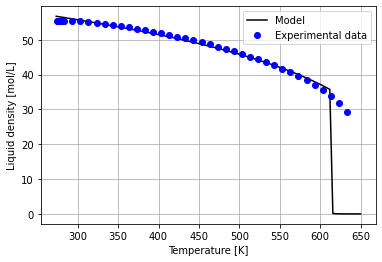

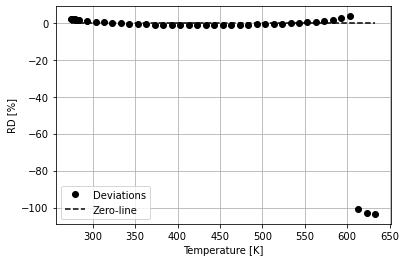

In [20]:
#Plot 1 - Liquid density vs temperature
plt.plot(T_model,rho_model,color="black")
plt.plot(expT,expRho,'o',color="blue",markersize=  6)
plt.xlabel("Temperature [K]")
plt.ylabel("Liquid density [mol/L]")
plt.legend(["Model","Experimental data"])
plt.grid()
plt.show()

#Plot 2 - Relative deviation vs temperature
plt.plot(expT,deviation,marker='o',color='black',linestyle='',markersize=6)
plt.plot([expT[0],expT[np.size(expT)-1]],[0,0],linestyle='--',color='black')
plt.grid()
plt.xlabel("Temperature [K]")
plt.ylabel("RD [%]")
plt.legend(["Deviations","Zero-line"])
plt.show()

An interesting observation from these calculations, is that the model fails to compute liquid density at high temperatures.

### 4.6 PTFlash

The PTFlash function is used for flash calculations. Often the function is used for modelling binary mixtures in VLE equilibrium. Therefore a function called <i>BinaryVLE_comparison</i> has been developed It directly compares prodel predictions of binary VLE systems with experimental data.<br><br>
<b>Example with MEG-Methane</b><br>
The phase compositition in each phase will be calculated and compared with simulated experimental data. First a binary mixture containing MEG and methane is set up, and CPA is picked as a model

In [21]:
Case = xt.xThermoInterface() #Loading the interface
Case.ChooseAModel(1) # 1 - CPA model
Case.NoPureComp(2) #Number of pure components
Case.CritProps(1, 719.6, 82.0, 0.5211) #MEG 4C
Case.CritProps(2, 190.6, 45.9, 0.01155) #Methane
Case.CPAParams(1, 51.4, 2531.7, 0.6744) #MEG 4C
Case.CPAParams(2, 29.10, 959.03, 0.4472) #Methane
Case.AssocParams(1, 22, 14.1, 2375.8) #MEG 4C
Case.NoSpecKij(1) #Number of specified kij's (in this case 1)
Case.SpecKij(1,1,2,0.1787,0,0) #Kij

<b>Loading the data</b><br>
The next step of the process is to load experimentl data. The experimental data must be defined as a list (even if only <i>one</i> datapoint is known!  A list of temperatures, pressures, vapor compositions, liquid compositions and optionally a feed composition. 

In [22]:
#Not actual data, but close
#Two datapoints
#For example, the temperature at datapoint 1 is 323K and temperature at datapoint 2 is 333K.
#Thus, the temperature array is [323,333]
expT = np.array([323.15,323.15,323.15,323.15,323.15,323.15,323.15,323.15,323.15,323.15,323.15]) #Temperatures [K]
expP = np.array([23.7,23.9,59.8,103,159,198,200,253,292,341,395]) #Pressures [bar]
expZ = np.array([[0.5,0.5],[0.5,0.5]]) #Feed compositions (if known). expZ = [molefrac_of_comp_1, molefrac_of_comp_2]
expX = 1 - np.array([0.003,0.003,0.0066,0.011,0.0148,0.0174,0.0179,0.0207,0.0224,0.0249,0.0268]) #Mole fraction of comp 1 in liquid phsae 
#expY = np.array([2.7182e-05, 5.0082e-05]) #Mole fraction of comp 1 in vapor phase
expY = np.zeros(np.size(expT))
expY = expY + 0.5

<b>Running the calculations</b><br>
The comparison function is now called, and returns two lists: a list containing the liquid phase deviations and  list containing vapor phase deviations.

In [23]:
Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case,'RD')

(np_vl1, vl1Pxy, np_ll, llPxy, np_vl2, vl2Pxy, critpoint, nscrit, ierr) = Case.PXYdiagram(T=323, npoint_max=100, step_max=0.5)
(deviation_x, deviation_y) = CompObject.BinaryVLE_Comparison(expT, expP, expX, expY, 1)

Case.Finishup_Thermo()

print('Printing Deviations liquid phase deviations [%]')
print(deviation_x)


Printing Deviations liquid phase deviations [%]
[-0.41807297  0.37427192  4.8253352  -1.95003164 -0.32629461 -2.27001592
 -4.40358437 -4.87494006 -4.72945224 -6.85616286 -6.65948149]


<b>Interpreting results</b><br>
The comparison function returns two lists, containing the model errors for the liquid phase and vapor phase respectively. In this case we were only interested in the liquid phase, so we will solely deal with the liquid phase.

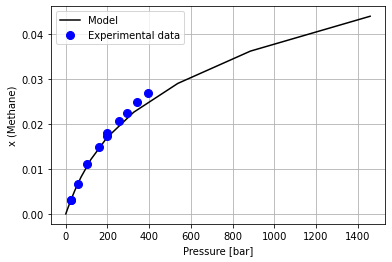

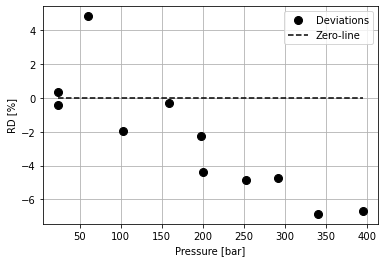

In [24]:
#We are extracting the liquid phase molar fractions and the corresponding pressures.
x = vl1Pxy[0]
P = vl1Pxy[2]
#The current molar fractions are expressed in terms of MEG, but we would rather  express it in terms 
#of Methane, so we make the following conversion
x = 1 - x
expX_methane = 1 - expX

#Plot 1 - Composition vs pressure (comparing model with data)
plt.plot(P,x,color="black")
plt.plot(expP,expX_methane,'o',color="blue",markersize=  8)
plt.xlabel("Pressure [bar]")
plt.ylabel("x (Methane)")
plt.legend(["Model","Experimental data"])
plt.grid()
plt.show()

#Plot 2 - Relative deviation vs pressure
plt.plot(expP,deviation_x,marker='o',color='black',linestyle='',markersize=8)
plt.plot([expP[0],expP[np.size(expP)-1]],[0,0],linestyle='--',color='black')
plt.grid()
plt.xlabel("Pressure [bar]")
plt.ylabel("RD [%]")
plt.legend(["Deviations","Zero-line"])
plt.show()


An interesting observation here, is that the model overpredicts the data at low pressures and proceeds to underpredict the data at high pressures.

## 5 Cases
### 5.1 Case 1 - Evaluating EoS performance
<b>Case task</b><br>
A company has reached out to you, asking for help picking an equation of state to model their system. The company is planning on using SRK to model the liquid density of water in the temperature range [350K to 550K], but were recently made aware that SRK does not take hydrogen bonding into account. The company has heard about an equation of state known as CPA, which supposedly takes hydrogen bonding into consideration. Applying the CPA EoS will require more work for the company, but they are willing to apply CPA if you deem it necessary. Which EoS performs the best, and which EoS do you recommend the company applies?

<b>Case work</b><br>
In order to determine which EoS performs the best, the model must be compared to experimental data. Luckily, we have a csv file containing liquid density data points lying around. The data is now loaded.

In [25]:
temporary_data = pd.read_csv('experimental_data/h2o_liq_density.csv').values.tolist() #Reading pdf file

h2o_vap_density = []
for element in temporary_data:
    if element[0] <= 550 and element[0] >= 350:
        h2o_vap_density.append(element)
h2o_vap_density = np.array(h2o_vap_density)


expT = h2o_vap_density[:,0].tolist() #Extracting temperature column
expRho = h2o_vap_density[:,1].tolist() #Extracting density column


Since we are modelling water as a pure component, we set the experimental composition to 1.

In [26]:
expComposition = [1.0]

We are now ready to perform modelling and model evaluations. First the CPA model is applied, which is done in the code block below. Notice that the temperature range of the modelling is 350-550K, since that is the range of interest for the customer.

In [27]:
Case = xt.xThermoInterface()
Case.ChooseAModel(1) # CPA = 1
nc = 1
Case.NoPureComp(nc)
Case.CritProps(1, 647.29, 220.64000, 0.3449)
Case.CPAParams(1, 14.515, 1017.3, 0.6736)
Case.AssocParams(1, 22, 69.2, 2003.2)

Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case, 'ARD')

CPA_deviation = CompObject.LiqRho_comparison(expT,expRho,expComposition)

CPA_T_model = np.linspace(350,550,100)
CPA_rho_model = []
for T in CPA_T_model:
    rho = Case.LiqRho(T,[1.0])
    CPA_rho_model.append(rho)
    
Case.Finishup_Thermo()

 Now we perform calculations for SRK, notice that we only need critical properties for SRK

In [28]:
Case = xt.xThermoInterface()
Case.ChooseAModel(2) # SRK = 2
nc = 1
Case.NoPureComp(nc)
Case.CritProps(1, 647.29, 220.64000, 0.3449)

Case.Setup_Thermo()

CompObject = xt.ComparisonFuncs(Case, 'ARD')

SRK_deviation = CompObject.LiqRho_comparison(expT,expRho,expComposition)

SRK_T_model = np.linspace(350,550,100)
SRK_rho_model = []
for T in SRK_T_model:
    rho = Case.LiqRho(T,[1.0])
    SRK_rho_model.append(rho)
    
Case.Finishup_Thermo()

<b>Results evalution</b><br>
Now that all relevant calculations have been performed, it is time to show the results. The approach for the results section is similar to that of previous examples in this Jupyter Notebook. We will look at a graph where models are directly compared to experimental data. Furthermore, a graph with deviations between the models and all the datapoints will be shown.

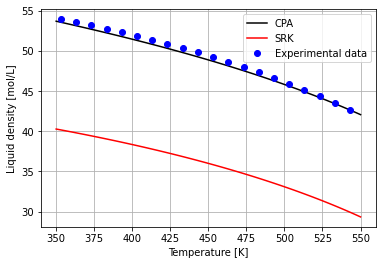

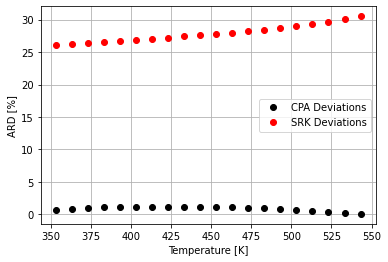

In [29]:
#Plot 1 - Liquid density vs temperature
plt.plot(CPA_T_model,CPA_rho_model,color="black")
plt.plot(SRK_T_model,SRK_rho_model,color="red")
plt.plot(expT,expRho,'o',color="blue",markersize=  6)
plt.xlabel("Temperature [K]")
plt.ylabel("Liquid density [mol/L]")
plt.legend(["CPA","SRK","Experimental data"])
plt.grid()
plt.show()

#Plot 2 - Absolute relative deviation vs temperature
plt.plot(expT,CPA_deviation,marker='o',color='black',linestyle='',markersize=6)
plt.plot(expT,SRK_deviation,marker='o',color='red',linestyle='',markersize=6)
plt.grid()
plt.xlabel("Temperature [K]")
plt.ylabel("ARD [%]")
plt.legend(["CPA Deviations","SRK Deviations"])
plt.show()

<b>Conclusion</b><br>
From the results it is seen that SRK EoS does a poor job at predicting the liquid density of water in the requested temperature range. This, of course, is not a surprise, since the SRK EoS does not take any hydrogen bonding into account which happens very prevalent in water. On the other hand, CPA was designed to take the best parts of SRK and then take association (hydrogen bonding) into consideration. And this is confirmed by the results, where CPA only exhibit absolute deviations at or below 2%. In conclusion, we recommend that the company applies CPA, despite the extra efforts required to apply CPA.